In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fpath_annotations = '../Data/Labeling/merged_annot.tsv'

plt.style.use('default')

In [30]:
df = pd.read_csv(fpath_annotations, sep='\t')

# drop papers that were not annotated
df = df.dropna(axis='index', how='any', subset=['Data Available', 'Open Access', 'Code Available'])

df

,PMID,Title,Authors,Citation,First.Author,Journal.Book,Publication.Year,Create.Date,PMCID,NIHMS.ID,DOI,Data Available,Open Access,Code Available,Notes
0,24371792,The effects of tetrahydrobiopterin (BH4) treat...,"Christ SE, Moffitt AJ, Peck D, White DA.",Neuroimage Clin. 2013 Aug 30;3:539-47. doi: 10...,Christ SE,Neuroimage Clin,2013,2013-12-28,PMC3871382,NaN,10.1016/j.nicl.2013.08.012,False,True,False,NaN
1,26586814,Default Mode Dynamics for Global Functional In...,"Vatansever D, Menon DK, Manktelow AE, Sahakian...",J Neurosci. 2015 Nov 18;35(46):15254-62. doi: ...,Vatansever D,J Neurosci,2015,2015-11-21,PMC4649001,NaN,10.1523/JNEUROSCI.2135-15.2015,False,True,False,NaN
2,34099922,Baseline brain function in the preadolescents ...,"Chaarani B, Hahn S, Allgaier N, Adise S, Owens...",Nat Neurosci. 2021 Aug;24(8):1176-1186. doi: 1...,Chaarani B,Nat Neurosci,2021,2021-06-08,NaN,NaN,10.1038/s41593-021-00867-9,True,False,True,Data from ABCD study. GitHub repo says partial...
3,30890968,Decreased Response to Positive Facial Affect i...,"Goodin P, Lamp G, Hughes ME, Rossell SL, Ciorc...",Front Psychiatry. 2019 Mar 5;10:60. doi: 10.33...,Goodin P,Front Psychiatry,2019,2019-03-21,PMC6411826,NaN,10.3389/fpsyt.2019.00060,False,True,True,"Resampling helper functions only, not main ana..."
4,21296712,Occupational solvent exposure and brain functi...,"Tang CY, Carpenter DM, Eaves EL, Ng J, Ganesha...",Environ Health Perspect. 2011 Jul;119(7):908-1...,Tang CY,Environ Health Perspect,2011,2011-02-08,PMC3222975,NaN,10.1289/ehp.1002529,False,True,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,16997580,Developmental neural networks in children perf...,"Ciesielski KT, Lesnik PG, Savoy RL, Grant EP, ...",Neuroimage. 2006 Nov 15;33(3):980-90. doi: 10....,Ciesielski KT,Neuroimage,2006,2006/09/26,NaN,NaN,10.1016/j.neuroimage.2006.07.028,False,False,False,"Talairach Daemon Client software program, vers..."
350,31998111,Effects of Transcranial Direct Current Stimula...,"Nissim NR, O'Shea A, Indahlastari A, Kraft JN,...",Front Aging Neurosci. 2019 Dec 16;11:340. doi:...,Nissim NR,Front Aging Neurosci,2019,2020/01/31,PMC6961663,NaN,10.3389/fnagi.2019.00340,True,True,False,data avilable upon request to author
351,18050246,Functional magnetic resonance imaging assessme...,"DiFrancesco MW, Holland SK, Ris MD, Adler CM, ...",Arthritis Rheum. 2007 Dec;56(12):4151-63. doi:...,DiFrancesco MW,Arthritis Rheum,2007,2007/12/01,NaN,NaN,10.1002/art.23132,False,True,False,NaN
352,24590688,"Enhancement of functional connectivity, workin...","Ahluwalia V, Wade JB, Heuman DM, Hammeke TA, S...",Metab Brain Dis. 2014 Dec;29(4):1017-25. doi: ...,Ahluwalia V,Metab Brain Dis,2014,2014/03/05,PMC4155029,NIHMS572168,10.1007/s11011-014-9507-6,True,True,False,FMRIB's Software Library http://www.fmrib.ox.a...


## Plot distribution of papers

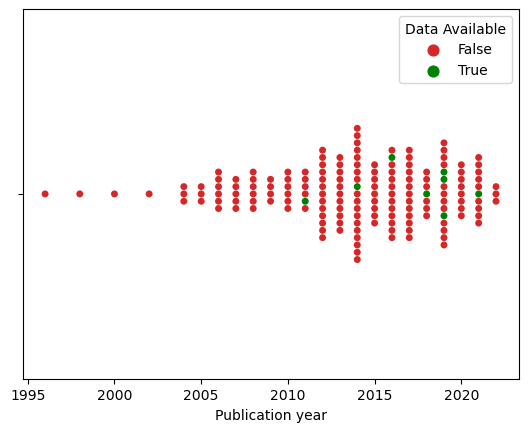

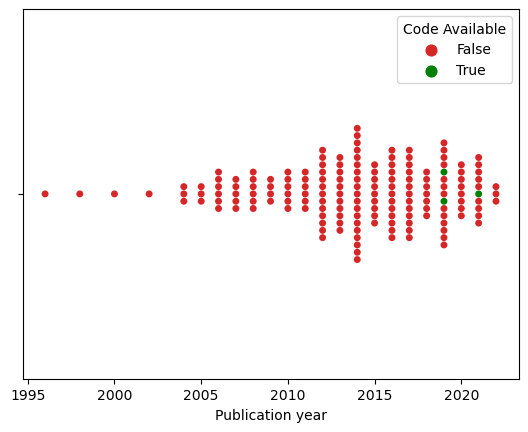

In [79]:
for colname, filename in zip(['Data Available', 'Code Available'], ['data_availability_by_year.png', 'code_availability_by_year.png']):

    fig, ax = plt.subplots()

    df['y'] = colname # need this because 'hue' doesn't work if 'y' is not specified
    ax = sns.swarmplot(x='Publication.Year', y='y', hue=colname, data=df, palette={True: 'green', False: 'tab:red'})
    ax.set_ylabel('')
    ax.set_yticklabels('')
    ax.set_xlabel('Publication year')

    fig.savefig(f'../Results/{filename}', dpi=300, bbox_inches='tight')


## Plot percentage of papers with data/code available

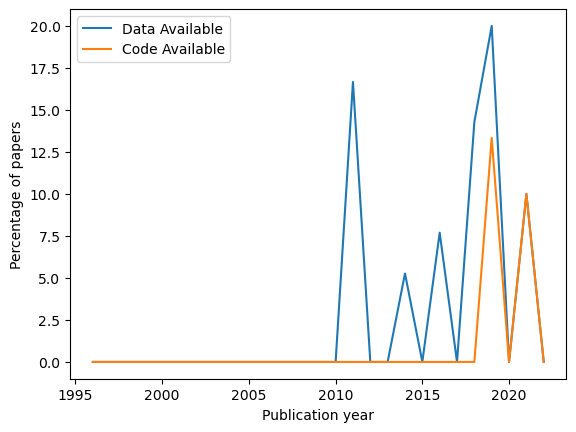

In [75]:
colnames = ['Data Available', 'Code Available']
filename = 'percentage_available_by_year.png'

fig, ax = plt.subplots()

for colname in colnames:
    percent_by_year = df.groupby('Publication.Year')[colname].apply(lambda x: x.sum()*100/x.count())
    ax.plot(percent_by_year, label=colname)

ax.legend()
ax.set_xlabel('Publication year')
ax.set_ylabel('Percentage of papers')

fig.savefig(f'../Results/{filename}', dpi=300, bbox_inches='tight')